In [5]:
import numpy as np 
import pandas as pd

* 불확정성을 수반한 현상을 해석하기 위해 확률을 사용하고, 그 확률을 사용한 무작위추출 혹은 주사위를 모델링한 것을 확률 모형이라고 합니다.

# 이산형 확률변수
* 확률변수 : 확률변수란 그 수치가 확률시험에 의하여 결정되는 양적 변수를 의미 
* 이산확률변수(discrete random variable)이란 표본공간의 결과(확률변수가 취하는 값)가 셀 수 있는 정도로 한정되어 있고, 확률변수가 취할 수 있는 모든 가능한 값이 정수와 같이 하나하나 셀수 있어 나열할 수 있는 확률변수를 의미
    > 가족 가운데 남자의 수 
    
    > 어떤 병원에서 하루에 출생하는 여자의 수
    
    > 한 시간 동안 어떤 은행에 도착하는 고객의 수

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
%precision 3

'%.3f'

## 1차원 이산형 확률변수
* 이산형 확률변수는 취할 수 있는 값이 이산적인 확률변수입니다. 
* 그중에서 1차원 이산형 확률변수에 관한 설명을 진행하겠습니다. 
* 표 5-1의 불공정한 주사위를 사용합니다. 

### 5.1.1 1차원 이산형 확률변수의 정의
* 확률변수는 변수가 취할 수 있는 값과 그 값이 나오는 확률에 의해서 정의
* 이산형 확률변수에 대입하면, 확률변수 X가 취할 수 있는 값에 대한 집합을 {${x_1, x_2, ....}$}
* 확률변수 X가 ${x_k}$라는 값을 취하는 확률을 
* $${P(X = x_k) = p_k (k=1,2,3,....)}$$

* 이 때 확률은 변수가 취할 수 있는 값 x를 인수로 하는 함수로 볼 수 있기 때문에 

* $${f(x) = P(X = x)}$$

* 이를 확률질량함수(probability mass function PMF) 또는 확률함수라고 부릅니다.
* 확률변수가 취할 수 있는 값과 그 확률의 구체적인 대응을 확률분포(probability distribution)이라고 합니다. 
* 따라서 확률변수의 확률분포가 결정되면 그 확률변수의 움직임이 정해집니다.
* 이산확률분포에는 이항분포, 포아송분포, 초기하분포등이 있습니다.

#### 불공정한 주사위 예제 
* 확률변수가 취할 수 있는 값의 집합을 x_set으로 정의 

In [8]:
x_set = np.array([1,2,3,4,5,6])

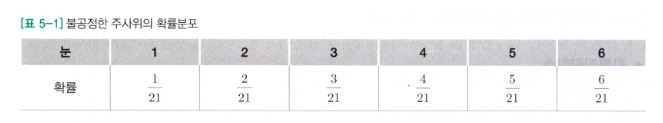

$${p_1 = P(X=1) = \frac{1}{21}}$$
$${p_1 = P(X=2) = \frac{2}{21}}$$
$${p_1 = P(X=3) = \frac{3}{21}}$$
$${.}$$
$${.}$$
$${.}$$
$${.}$$

* 확률함수 : 확률분포에서 확률변수 X가 어떤 특정한 실수 값 x를 취할 확률을 일일이 나열하지 않고, x의 함수로 간편하게 나타낸 것

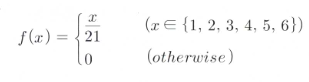

In [9]:
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

* 확률변수가 취할 수 있는 값의 집합과 확률변수의 세트가 확률분포입니다. 
* 이 확률분포에 의해 확률변수 X의 동작이 결정됩니다. 

In [16]:
X = [x_set, f]

* 확률변수 X가 정의되었습니다. 
* 확률변수로부터 각 ${x_k}$의 확률${p_k}$를 구해봅시다. 
* 여기서는 ${x_k}$와 확률 ${p_k}$의 대응을 사전식으로 표시하고 있습니다. 

In [17]:
prob = np.array([f(x_k) for x_k in x_set])

In [20]:
rt = dict(zip(x_set, prob))

In [23]:
sum(prob)

0.9999999999999999

* 확률변수가 취할 수 있는 값과 확률의 대응을 막대그래프로 표시

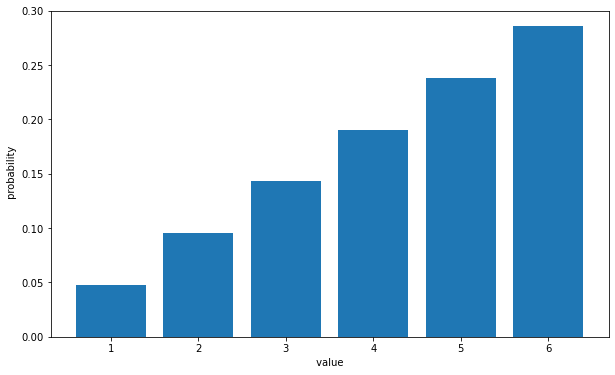

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel(' value ')
ax.set_ylabel(' probability')
plt.show()

##### 확률의 성질
* 확률은 절대적으로 0이상으로, 모든 확률을 더하면 1이 되어야 합니다. 

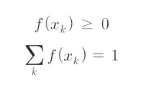

* 확률이 모두 0 이상인지는 np.all 함수를 사용하면 확인할 수 있습니다. 
* np.all은 모든 요소가 참일 때만 참을 반환하는 함수입니다.

In [14]:
np.all(prob >= 0)

True

* 확률의 총합이 1이 된다는 것을 확인해봅시다.

In [15]:
np.sum(prob)

0.9999999999999999

## Q1. 다음 함수는 확률질량함수인가?
${P(X= x) = \frac{x^2}{10}}$ ( x = -2, -1, 1, 2일때)

In [28]:
g = lambda x : x**2 / 10

In [30]:
sum([g(x) for x in [-2, -1, 1, 2]])

1.000

In [31]:
[g(x) for x in [-2, -1, 1, 2]]

[0.400, 0.100, 0.100, 0.400]

### A.

#### 누적분포함수
* 확률함수는 확률변수 X가 x가 될 때의 확률을 반환하는 함수이지만, 확률변수 X가 x이하가 될 때의 확률을 반환하는 함수도로도 자주 사용됩니다. 
* 이와 같이 함수 F(x)를 누적분포함수(cumulative distribution function CDF) 또는 분포함수라고 합니다. 

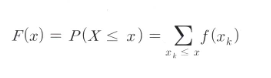

In [32]:
def F(x):
    return np.sum(  [f(x_k) for x_k in x_set if x_k <= x]    )

* 분포함수를 사용해서 눈이 3 이하가 되는 확률을 구해보면 다음과 같습니다.

In [48]:
F(3)

0.2857142857142857

* 확률의 변환
* 확률변수의 변환이란 확률변수 X에 2를 곱하고 3을 더한 2X+3과 같은 것으로, 확률변수를 표준화 할 때 중요한 연산입니다. 
* 변환한 2X + 3은 확률변수인가? 그렇다면 그 확률분포는 어떻게 되는가?

In [49]:
y_set = np.array([2*x_k + 3 for x_k in x_set])

In [50]:
prob = np.array([f(x_k) for x_k in x_set])

In [51]:
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

### 1차원 이산형 확률변수의 지표
* 데이터의 평균과 마찬가지로, 확률변수의 평균은 확률변수의 중심을 나타내는 지표가 됩니다.
* 확률변수의 평균이란 확률변수를 몇 번이나 (무제한으로) 시행하여 얻어진 실현값의 평균을 가리킵니다.
* 주사위라면 무한 번 주사위를 굴려 얻는 눈의 평균 

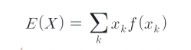

* 확률변수의 평균은 기대값(expected value)이라고도 부릅니다. 
* 기호로 ${\mu}$나 E(X)라고 표기합니다.

* 이산형 확률변수의 경우, 확률변수의 평균은 확률변수가 취할 수 있는 값과 그 확률의 곱의 총합
* 이 식으로 계산되는 값이 확률변수를 무제한 시행하여 얻은 실현값의 평균과 일치

In [41]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

* 1000만번 주사위를 시행

In [42]:
sample = np.random.choice(x_set, 100000000, p=prob)

In [43]:
sample.size

100000000

In [44]:
np.mean(sample)

4.33326974

* 계산된 결과가 기댓값과 일치하는 것을 확인

### Q. 일반적인 주사위를 한 번 던졌을 때, 나올 눈의 기댓값은 얼마인가?

### A. 3.5

### Q. 어떤 가게에서 하루에 판매하는 제품의 수량과 확률을 나타내는 확률분포가 다음과 같다. 하루 판매량을 확률변수라고 할 때 그의 기대값을 구하여라.

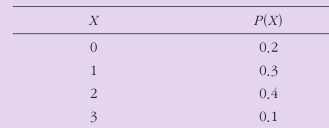

* 기대값의 특성 

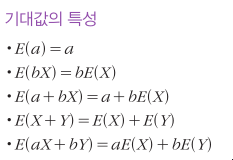

### A.

### Q 확률변수 X이 평균은 5, 확률변수 Y의 평균은 4라고 할 때 E(3X-2Y+3)의 값은 얼마인가?

### A.

In [45]:
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [46]:
E(X)

4.333333333333333

In [47]:
E(X, g=lambda x : 2*x + 3)

11.666666666666664

In [48]:
2 * E(X) + 3

11.666666666666666

### 분산
* 분산은 확률변수의 값들이 기대값을 중심으로 얼마나 흩어져 있는가를 나타내는 산포도의 측정치
* 확률변수의 분산도 데이터의 분산과 마찬가지로 산포도를 나타내는 지표가 됩니다. 
* 이산형 확률변수의 경우, 분산은 다음 식과 같이 편차 제곱의 기대값으로 정의됩니다. 

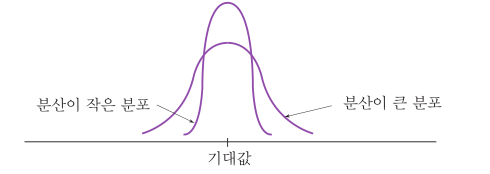

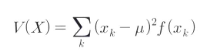

* 분산은 ${\sigma^2}$이나 V(X)로 표기

In [49]:
mean = E(X)
np.sum([ (x_k - mean) **2 * f(x_k) for x_k in x_set])

2.2222222222222223

### 이산형 확률변수의 분산

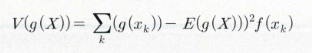

In [50]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [51]:
V(X)

2.2222222222222223

In [52]:
V(X, lambda x : 2*x + 3)

8.88888888888889

### 예제

In [53]:
import pandas as pd

In [54]:
df = pd.DataFrame({'X' : [0,1,2,3],
             'P(X)' : [0.2, 0.3, 0.4, 0.1]})

In [55]:
df['X-E(X)'] = df['X'] - 1.4

In [56]:
df['[X-E(X)]^2'] = df['X-E(X)'] ** 2

In [57]:
df['[X-E(X)]^2 * P(X)'] = df['[X-E(X)]^2'] * df['P(X)']

* 분산

In [58]:
df['[X-E(X)]^2 * P(X)'].sum()

0.8400000000000001

* 표준편차

In [59]:
np.sqrt(df['[X-E(X)]^2 * P(X)'].sum())

0.9165151389911681

### 분산의 공식
* a, b를 실수, X를 확률변수라고 하면 
    > ${V(aX + b) = a^2V(X)}$

* V(2X + 3)

In [60]:
2**2 * V(X)

8.88888888888889

### Q. 한 동전을 세 번 던지는 실험에서 앞면이 나오는 수를 확률변수 X라고 할 때, 
* (1) E(X)와 Var(X)를 구하여라
* (2) X의 값이 1 또는 2이면 350원을 받고 0 또는 3이면, 1000원을 주는 내기일 경우 기대 값은 얼마인가? 이는 유리한 내기인가?

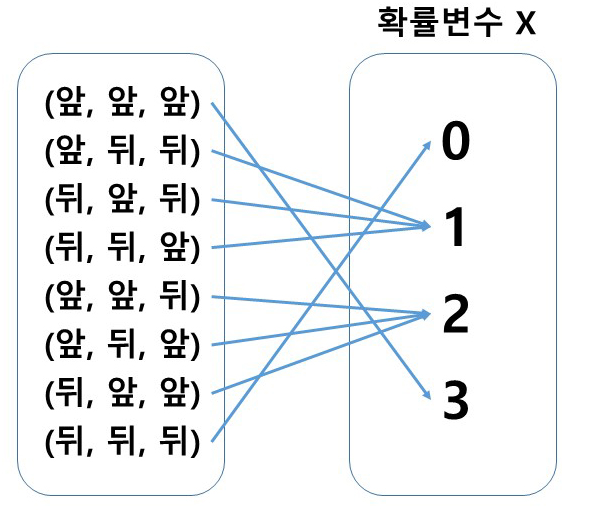

In [94]:
df = pd.DataFrame({'X' : [0,1,2,3],
             'P(X)' : [1/8, 3/8, 3/8, 1/8]})

In [95]:
df

,X,P(X)
0,0,0.125
1,1,0.375
2,2,0.375
3,3,0.125


## xPx()

In [96]:
df['xP(x)'] = df['X'] * df ['P(X)']

In [102]:
# 기댓값 1.5
mean = df['xP(x)'].sum()

### X-E(X)

In [103]:
df['X-E(X)'] = df['X'] -mean

In [104]:
df['X-E(X)^2'] = df['X-E(X)'] **2

In [105]:
df

,X,P(X),xP(x),X-E(X),X-E(X)^2
0,0,0.125,0.000,-1.5,2.25
1,1,0.375,0.375,-0.5,0.25
2,2,0.375,0.750,0.5,0.25
3,3,0.125,0.375,1.5,2.25


In [111]:
df['var'] = df['X-E(X)^2'] * df['P(X)']
df['var'].sum()

0.75

In [112]:
df

,X,P(X),xP(x),X-E(X),X-E(X)^2,var
0,0,0.125,0.000,-1.5,2.25,0.28125
1,1,0.375,0.375,-0.5,0.25,0.09375
2,2,0.375,0.750,0.5,0.25,0.09375
3,3,0.125,0.375,1.5,2.25,0.28125


X의 값이 1또는 2이면 350원을 받고 0또는 3이면, 1000원 주는 내기일 경우 기대 값은 얼마인가? 이는 유리한 내기인가?

In [115]:
(-1000 * 1/8) + (350 * 3/8) + (350 * 3/8) + (-1000 * 1/8)

12.500

## 2차원 이산형 확률변수
* 2개의 불공정한 주사위를 사용하여 예제를 설명합니다.

### 2차원 이산형 확률변수의 정의
#### 결합확률분포
* 2차원 확률변수에서 1차원 확률분포 2개를 동시에 다룹니다. (X, Y) 또한 확률변수의 움직임은 취할 수 있는 값의 조합으로 이루어진 집합과 그 확률에 의해 정해집니다. 

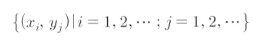

* 확률은 X와 Y가 각각 취할 수 있는 값의 조합에 관해서 정의할 수 있고, 확률변수 X가 ${x_i}$, 확률변수 Y가 ${y_j}$를 취하는 확률은

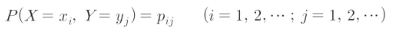

* 확률변수(X, Y)의 움직임을 동시에 고려한 분포를 결합확률분포(joint probability distribution) 또는 결합분포라고 합니다.

* 2차원 확률변수의 간단한 예로, 불공정한 주사위 A와 B를 2개를 굴려 A의 눈을 확률변수 X, B의 눈을 확률변수 Y라고 했을 때의 (X, Y)를 들 수 있습니다. 그러나 이와 같은 2차원 확률분포는 공분산이 0이 되어버립니다. 
* 주사위 A의 눈과 주사위 B의 눈을 더한 것을 X, 주사위 A의 눈을 Y로 한 2차원 확률분포를 생각해봅시다. 

* X = {2,3,4,5,6,7,8,9,10,11,12}
* Y = {1,2,3,4,5,6}

* X = 9이고 Y = 4일 때의 확률
* A와 B의 눈의 합이 9, A의 눈이 4라는 의미, B의 눈은 5
* A의 눈이 4, B의 눈이 5가 되는 결합확률을 구하면 4/21 * 5/21 = 20/441

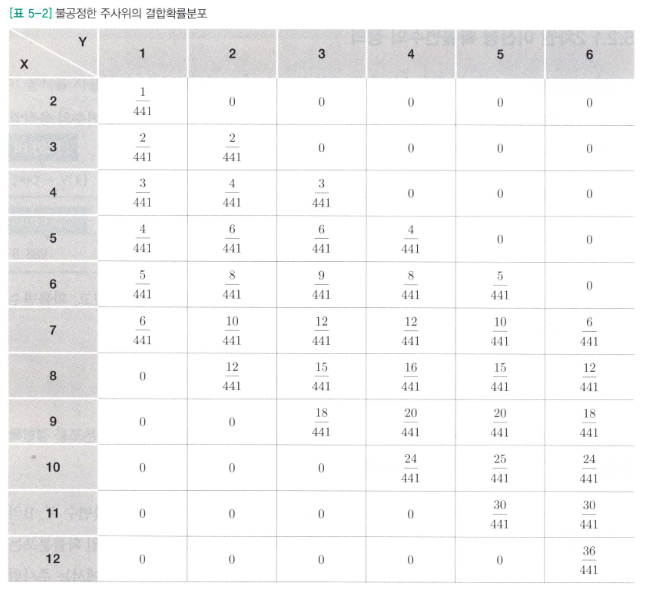

* 2차원 확률분포의 확률은 x와 y를 인수로 취하는 함수라고 볼 수 있습니다. 
* 그와 같은 P(X = x, Y=y) = f_xy(x,y)가 되는 결합확률함수(joint probability function)이라고 합니다.

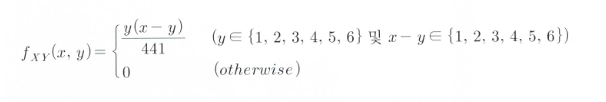

#### 확률의 성질 
* 2차원 이산형 확률변수도 1차원의 경우와 마찬가지로, 확류은 반드시 0 이상이어야 하며 전체 확률은 1이 되어야 합니다. 
* 2차원 이산형 확률변수는 확류의 성질로서 다음 두 가지 식을 만족해야 합니다. 

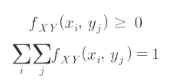

In [61]:
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [62]:
def f_XY(x, y):
    if 1 <= y <=6 and 1 <= x - y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [63]:
XY = [x_set, y_set, f_XY]

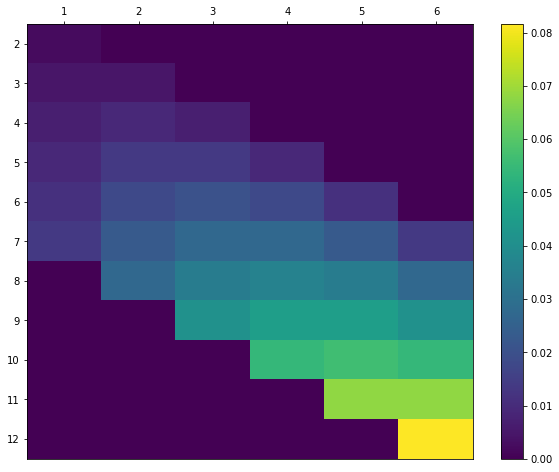

In [64]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()
# x축의 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [65]:
prob

array([[0.002, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.005, 0.005, 0.   , 0.   , 0.   , 0.   ],
       [0.007, 0.009, 0.007, 0.   , 0.   , 0.   ],
       [0.009, 0.014, 0.014, 0.009, 0.   , 0.   ],
       [0.011, 0.018, 0.02 , 0.018, 0.011, 0.   ],
       [0.014, 0.023, 0.027, 0.027, 0.023, 0.014],
       [0.   , 0.027, 0.034, 0.036, 0.034, 0.027],
       [0.   , 0.   , 0.041, 0.045, 0.045, 0.041],
       [0.   , 0.   , 0.   , 0.054, 0.057, 0.054],
       [0.   , 0.   , 0.   , 0.   , 0.068, 0.068],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.082]])

In [66]:
np.all(prob >= 0)

True

In [67]:
np.sum(prob)

1.0

### 주변확률분포
* 확률변수(X, Y)는 결합확률분포에 의해 동시에 정의되지만, 개별 확률변수에만 흥미가 있을 수 있습니다. 
* 예를 들면, 확률변수 X만의 움직임, 즉 확률변수 X의 확률함수를 알고 싶은 상황입니다. 
* 이럴 때 확률변수 X의 확률함수 ${f_x(x)}$는 결합확률함수 f_xy에서 Y가 취할 수 있는 값 모두를 대입한 다음 모두 더한 

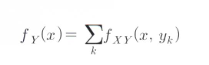

* 결합확률함수 f_xy에서 확률변수 Y의 영향을 제거하면 확률변수 X의 움직임을 나타내는 확률변수 X의 확률함수만 남는다고 생각하면 상상하기 쉽습니다. 
* 이와 같이 해서 얻은 ${f_x(x)}$를 X의 주변확률분포(marginal probability distribution) 간단히 X의 주변분포라고 합니다. 

In [68]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [69]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [70]:
x_set

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [71]:
y_set

array([1, 2, 3, 4, 5, 6])

In [72]:
X = [x_set, f_X]
Y = [y_set, f_Y]

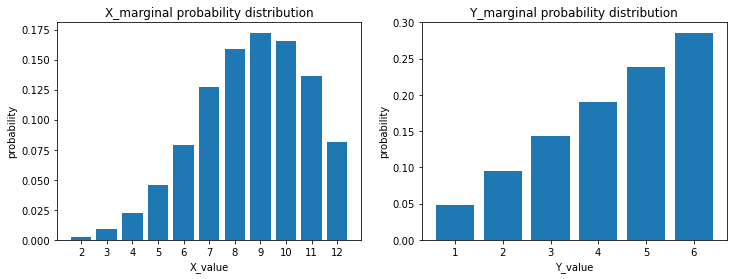

In [73]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

### 2차원 이산형 확률변수의 지표
#### 기대값 

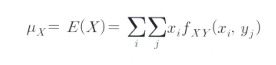

In [74]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

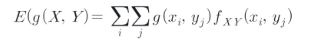

In [75]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [76]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.666666666666666

In [77]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333333333333333

#### 기대값의 선형성
* a, b를 실수 X, Y를 확률변수로 했을 때 
    > E(aX + bY) = aE(X) + bE(Y)

In [78]:
a, b = 2, 3

In [79]:
E(XY, lambda x, y: a*x + b*y)

30.333333333333332

In [80]:
a * mean_X + b * mean_Y

30.333333333333332

#### 분산
* 분산을 구하는 방법도 1차원의 경우와 거의 같습니다. 
* X의 분산이라면 X에 관한 편차 제곱의 기대값으로 구할 수 있습니다.

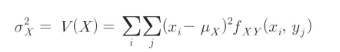

In [81]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
       for x_i in x_set for y_j in y_set])

4.444444444444444

In [82]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [83]:
var_X = V(XY, g=lambda x, y: x)
var_X

4.444444444444444

In [84]:
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.2222222222222223

### 공분산 
* 공분산을 사용하여 2개의 확률변수 X, Y 사이에 어느 정도 상관이 있는지 알 수 있습니다. 

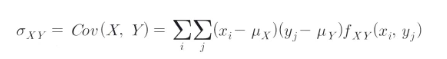

In [85]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [86]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

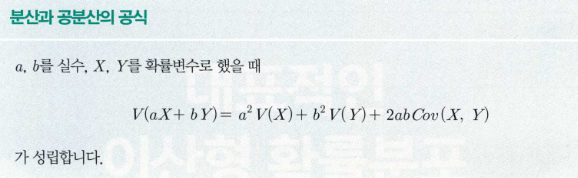

In [87]:
V(XY, lambda x, y: a*x + b*y)

64.44444444444444

In [88]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.44444444444443

### 상관계수 
* 확률변수의 상관계수는 데이터의 상관계수와 마찬가지로 공분산을 각각의 표준편차로 나누어 구합니다.

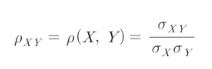

In [89]:
cov_xy / np.sqrt(var_X * var_Y)

0.7071067811865474